
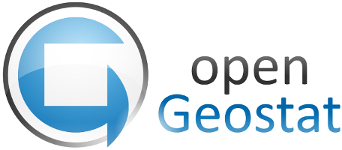

In [1]:
import gam
import pygslib

# test with arbitrary gslib files

In [2]:
parameters = {
    'datafl' : '../pygslib/data/true.dat',     # path to file, or none (to use '_xxx_.in') or numpy array (with columns [x,y])
    'ivar'   : [1,2],                      # variables column numbers to be used in ivtail and ivhead,                       # variables column numbers to be used in ivtail and ivhead,
    'tmin'   : -1.0e21,                      # trimming limits min and max (raws out of this range will be ignored)
    'tmax'   :  1.0e21,
    'outfl'  :  None,                       # path to the output file or None (to use '_xxx_.out')
    'igrid'  : 1,                          # grid realization number
    'nx'    : 50,                          # number of rows, cols and levels
    'ny'    : 50,
    'nz'    : 1,
    'xmn'   : .5,                        # coordinates of the centroid of first/corner block
    'ymn'   : .5,
    'zmn'   : .5,
    'xsiz'  : 1.,                        # grid node separation
    'ysiz'  : 1.,
    'zsiz'  : 1.,    
    'nlag'  : 10,                        # number of lags
    'igdir' : [[1,0,0],
               [0,1,0]],                 # [[ixd1,iyd1,izd1],...] directions along the grid (unit offsets) (array with shape [ndir,3])
    'standardize': 1,                     # standardize sill? (0=no, 1=yes)
    'ivpar': [[1, 1, 4, None],
              [1, 1, 3, None],
              [2, 2, 1, None],
              [2, 2, 3, None],
              [1, 1, 9, 2.5]]}              # tail, head, variogram type, and cut (with shape [nvarg,4])    


                  Parameters for GAM
                  *******************

START OF PARAMETERS:
../pygslib/data/true.dat                          -file with data
2 1 2                    - number of variables: column numbers
-1e+21 1e+21                     - trimming limits
_xxx_.out                           -file for variogram output
1                           -realization number
50  0.5  1.0               -nx,xmn,xsiz
50  0.5  1.0               -ny,ymn,ysiz
1  0.5  1.0               -nz,zmn,zsiz
2 10                     -number of direction and number of lags
1  0  0
0  1  0                          -directions along the grid (unit offsets) (array with shape [ndir,3])
1                     -standardize sill? (0=no, 1=yes)
5                           -number of variograms
1  1  4  None
1  1  3  None
2  2  1  None
2  2  3  None
1  1  9   2.5                          -tail, head, variogram type, cut (array with shape [nvarg,4])


cut[i] is only required if ivtype[i] == 9 or == 10




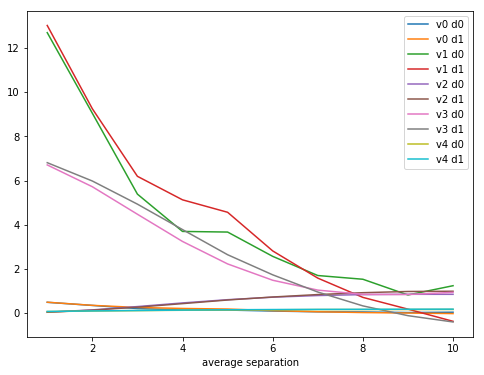

In [3]:
vg, fig, ax = gam.gam(parameters)

In [4]:
vg

average separation  var funct  number of pairs  \
Variogram Direction Lag                                                   
0         0         1                   1.0    0.49386             2450   
                    2                   2.0    0.35267             2400   
                    3                   3.0    0.21134             2350   
                    4                   4.0    0.14590             2300   
                    5                   5.0    0.14299             2250   
                    6                   6.0    0.09852             2200   
                    7                   7.0    0.06420             2150   
                    8                   8.0    0.05674             2100   
                    9                   9.0    0.03009             2050   
                    10                 10.0    0.04508             2000   
          1         1                   1.0    0.49794             2450   
                    2                   2.0    0.35596             2400   
                    3                   3.0    0.26077             2350   
                    4                   4.0    0.21491             2300   
                    5                   5.0    0.18971             2250   
                    6                   6.0    0.11553             2200   
                    7                   7.0    0.06660             2150   
                    8                   8.0    0.03007             2100   
                    9                   9.0    0.00824             2050   
                    10                 10.0   -0.01659             2000   
1         0         1                   1.0   12.69870             2450   
                    2                   2.0    9.05096             2400   
                    3                   3.0    5.38966             2350   
                    4                   4.0    3.70148             2300   
                    5                   5.0    3.67338             2250   
                    6                   6.0    2.57340             2200   
                    7                   7.0    1.70601             2150   
                    8                   8.0    1.53731             2100   
                    9                   9.0    0.82612             2050   
                    10                 10.0    1.24504             2000   
...                                     ...        ...              ...   
3         1         1                   1.0    6.81336             2450   
                    2                   2.0    5.98391             2400   
                    3                   3.0    4.93632             2350   
                    4                   4.0    3.78569             2300   
                    5                   5.0    2.64749             2250   
                    6                   6.0    1.73774             2200   
                    7                   7.0    0.95898             2150   
                    8                   8.0    0.33199             2100   
                    9                   9.0   -0.11095             2050   
                    10                 10.0   -0.39648             2000   
4         0         1                   1.0    0.07327             2450   
                    2                   2.0    0.10146             2400   
                    3                   3.0    0.11745             2350   
                    4                   4.0    0.13370             2300   
                    5                   5.0    0.14467             2250   
                    6                   6.0    0.15568             2200   
                    7                   7.0    0.16488             2150   
                    8                   8.0    0.16643             2100   
                    9                   9.0    0.16683             2050   
                    10                 10.0    0.16950             2000   
          1         1                   1.0    0.0

# test with numpy array


In [5]:
data = pygslib.gslib.read_gslib_file('../pygslib/data/true.dat')
data.columns

Index(['Primary', 'Secondary'], dtype='object')

In [6]:
parameters = {
    'datafl' : data[['Primary', 
                     'Secondary']].values,     # path to file, or none (to use '_xxx_.in') or numpy array (with columns [x,y])
    'tmin'   : -1.0e21,                      # trimming limits min and max (raws out of this range will be ignored)
    'tmax'   :  1.0e21,
    'outfl'  :  None,                       # path to the output file or None (to use '_xxx_.out')
    'igrid'  : 1,                          # grid realization number
    'nx'    : 50,                          # number of rows, cols and levels
    'ny'    : 50,
    'nz'    : 1,
    'xmn'   : .5,                        # coordinates of the centroid of first/corner block
    'ymn'   : .5,
    'zmn'   : .5,
    'xsiz'  : 1.,                        # grid node separation
    'ysiz'  : 1.,
    'zsiz'  : 1.,    
    'nlag'  : 10,                        # number of lags
    'igdir' : [[1,0,0],
               [0,1,0]],                 # [[ixd1,iyd1,izd1],...] directions along the grid (unit offsets) (array with shape [ndir,3])
    'standardize': 1,                     # standardize sill? (0=no, 1=yes)
    'ivpar': [[1, 1, 1, None],
              [1, 1, 3, None],
              [2, 2, 1, None],
              [2, 2, 3, None],
              [1, 1, 9, 2.5]]}              # tail, head, variogram type, and cut (with shape [nvarg,4])   

                  Parameters for GAM
                  *******************

START OF PARAMETERS:
_xxx_.in                          -file with data
2 1 2                    - number of variables: column numbers
-1e+21 1e+21                     - trimming limits
_xxx_.out                           -file for variogram output
1                           -realization number
50  0.5  1.0               -nx,xmn,xsiz
50  0.5  1.0               -ny,ymn,ysiz
1  0.5  1.0               -nz,zmn,zsiz
2 10                     -number of direction and number of lags
1  0  0
0  1  0                          -directions along the grid (unit offsets) (array with shape [ndir,3])
1                     -standardize sill? (0=no, 1=yes)
5                           -number of variograms
1  1  1  None
1  1  3  None
2  2  1  None
2  2  3  None
1  1  9   2.5                          -tail, head, variogram type, cut (array with shape [nvarg,4])


cut[i] is only required if ivtype[i] == 9 or == 10



GAM Version: 2.

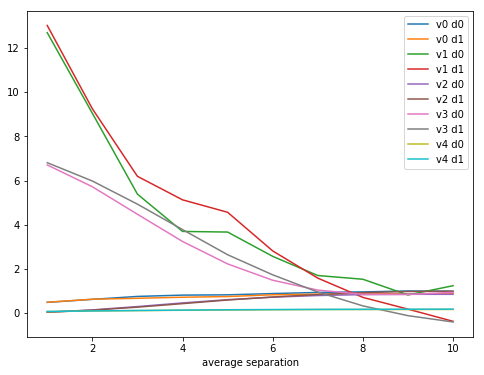

In [7]:
vg = gam.gam(parameters)

In [8]:
import numpy as np
any(np.array([1,2,3,4,5])==40)

False